<img src="../../../img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699"> Web Time Series Service (WTSS) examples</span>
<hr style="border:2px solid #0077b9;">

If you haven't installed the [WTSS client for Python](https://github.com/brazil-data-cube/wtss.py), install it with `pip`:

In [ ]:
!python -m pip install wtss

For more information on [WTSS client for Python](https://github.com/brazil-data-cube/wtss.py), see the introductory Jupyter Notebook about [Web Time Series Service (WTSS)](./wtss-introduction.ipynb) Introduction notebook.

# 1. Load the WTSS 
<hr style="border:1px solid #0077b9;">

In [2]:
from wtss import wtss

# 2. Set the service and Search for time series
<hr style="border:1px solid #0077b9;">

In [3]:
service = wtss.WTSS('https://brazildatacube.dpi.inpe.br/esensing/')

In [4]:
time_series = service.MOD13Q1.ts(attributes=('nir', 'red'),
                 latitude=-16.817, longitude=-52.079,
                 start_date="2017-01-01", end_date="2019-12-31")

### Plot

In [5]:
time_series.plot()

<Figure size 640x480 with 1 Axes>

# 3. Scatter Plot
<hr style="border:1px solid #0077b9;">

In [6]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Let's see the time series values:

In [7]:
print(time_series.nir)
print()
print(time_series.red)

[3247.0, 3941.0, 2937.0, 3852.0, 3171.0, 2843.0, 2760.0, 2708.0, 2521.0, 2404.0, 2347.0, 2305.0, 2194.0, 2180.0, 2514.0, 2164.0, 2372.0, 2718.0, 3234.0, 3822.0, 4193.0, 4281.0, 3807.0, 4794.0, 3072.0, 3529.0, 3552.0, 2978.0, 3533.0, 2247.0, 2537.0, 2518.0, 2427.0, 2122.0, 1983.0, 2156.0, 2228.0, 2165.0, 1977.0, 2643.0, 2652.0, 3049.0, 4507.0, 5096.0, 4240.0, 4189.0, 4231.0, 2691.0, 4635.0, 2385.0, 2496.0, 3024.0, 2879.0, 2047.0, 2343.0, 2209.0, 2108.0, 2025.0, 2086.0, 2290.0, 1998.0, 2063.0, 2516.0, 2870.0]

[181.0, 583.0, 1875.0, 227.0, 948.0, 125.0, 181.0, 146.0, 178.0, 157.0, 237.0, 230.0, 238.0, 306.0, 456.0, 506.0, 608.0, 418.0, 484.0, 402.0, 561.0, 299.0, 191.0, 269.0, 137.0, 363.0, 1428.0, 174.0, 247.0, 181.0, 170.0, 189.0, 173.0, 170.0, 196.0, 240.0, 333.0, 369.0, 370.0, 617.0, 300.0, 208.0, 285.0, 4028.0, 230.0, 223.0, 226.0, 125.0, 319.0, 177.0, 154.0, 210.0, 259.0, 158.0, 163.0, 163.0, 176.0, 189.0, 233.0, 310.0, 404.0, 434.0, 436.0, 336.0]


Performing a scatterplot between red and NIR Time Series we can see the correlation of theese bands through the time for the selected pixel:

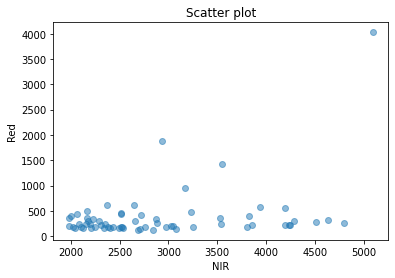

In [8]:
plt.scatter(time_series.nir, time_series.red, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('NIR')
plt.ylabel('Red')
plt.show()

Comparing the Time Series of a same band of two close in space pixels, we can see that their values are similar:

In [9]:
time_series2 = service.MOD13Q1.ts(attributes=('nir', 'red'),
                 latitude=-16.819, longitude=-52.079,
                 start_date="2017-01-01", end_date="2019-12-31")

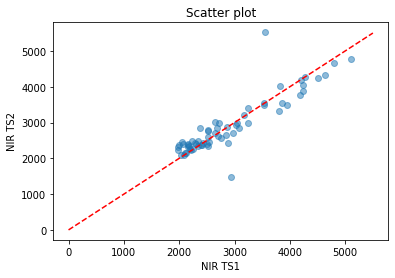

In [10]:
plt.scatter(time_series.nir, time_series2.nir, alpha=0.5)
ident = [0.0, 5500.0]
plt.plot(ident,ident, color='red', ls='--')
plt.title('Scatter plot')
plt.xlabel('NIR TS1')
plt.ylabel('NIR TS2')
plt.show()

# 4. Calculate Median Time Series
<hr style="border:1px solid #0077b9;">

Given a set of Time Series we may want to extract the median time series, which normally is the one with less noise:

In [11]:
import numpy
import matplotlib.pyplot as plt

In [12]:
agriculture_time_series = []
for latitude in numpy.arange(-16.905,-16.955,-0.01):
    time_series = service.MOD13Q1.ts(attributes=('nir'), latitude=float(latitude), longitude=-53.989, start_date="2017-01-01", end_date="2019-12-31")
    agriculture_time_series.append(time_series.nir)

In [13]:
len(agriculture_time_series)

5

In [14]:
median = numpy.median(agriculture_time_series, axis=0)

In [15]:
median

array([4118., 5551., 3536., 4345., 2939., 3360., 3918., 3712., 4065.,
       3735., 2970., 2730., 2727., 2769., 2970., 3131., 3408., 2424.,
       2686., 3021., 3071., 2884., 4471., 5235., 5470., 3265., 2264.,
       3716., 3821., 5104., 4451., 4553., 4052., 3274., 2605., 2557.,
       2425., 3542., 3252., 2542., 2945., 3655., 3549., 5768., 4638.,
       3588., 3277., 2975., 3598., 2827., 3590., 4818., 4979., 5510.,
       5123., 3925., 3362., 2994., 3096., 3347., 2966., 3451., 3346.,
       3576.])

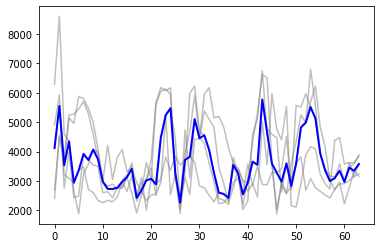

In [16]:
for i in range(len(agriculture_time_series)):
    plt.plot(agriculture_time_series[i], color='grey', alpha=0.5)
plt.plot(median, color='blue', linewidth=2)
plt.show()

# 5. Time Series Smoothing
<hr style="border:1px solid #0077b9;">

Smoothing Algorithms are also used to reduce time series noise, one of the most used smoothing algorithm is Savitz Golay:

In [17]:
from scipy.signal import savgol_filter

In [18]:
median_smoothed = savgol_filter(median, window_length = 9, polyorder = 2)

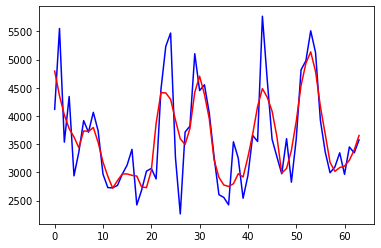

In [19]:
plt.plot(median, color='blue')
plt.plot(median_smoothed, color='red')
plt.show()

# 6. References
<hr style="border:1px solid #0077b9;">

- [WTSS OpenAPI 3 Specification](https://github.com/brazil-data-cube/wtss-spec)


- [WTSS Server](https://github.com/brazil-data-cube/wtss)


- VINHAS, L.; QUEIROZ, G. R.; FERREIRA, K. R.; CÂMARA, G. [Web Services for Big Earth Observation Data](http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004). Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.

# 7. See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [WTSS Introduction](./wtss-introduction.ipynb)